In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style="darkgrid")
from matplotlib import gridspec
import matplotlib.cm as cm
import warnings
from mpl_toolkits import mplot3d

warnings.filterwarnings(action='once')
print(sns.__version__, pd.__version__, np.__version__)

0.8.1 0.23.0 1.14.3


#### Plot line curve and histogram jointly

In [ ]:
## Mockup data
num_samples = 1000
x = 0.15 * np.random.randn(num_samples)
t = np.arange(num_samples)

In [168]:
raw = np.load('random_data/lidar_0.npy')
num_samples, num_channels = raw.shape
X = raw[:, :]
t = np.arange(num_samples)
trajectory = np.load('random_data/trajectory0.npy')
print(X.shape, trajectory.shape)

(300, 9) (300, 3)


In [160]:
colors = cm.viridis(np.linspace(0, 1, num_channels))

Text(0.5,0.92,'Random trajectory')

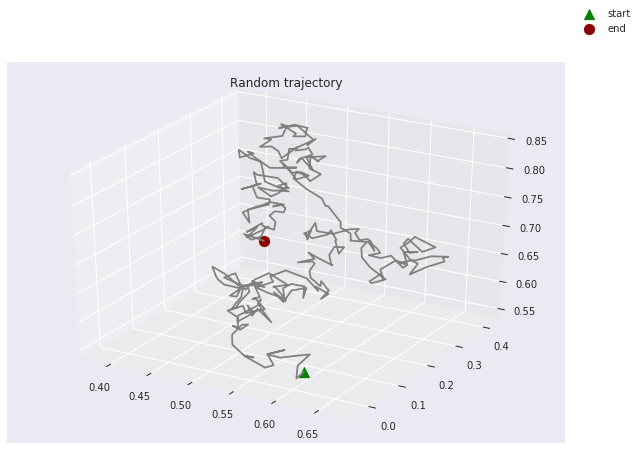

In [216]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot3D(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'grey');
ax.scatter3D(trajectory[0, 0], trajectory[0, 1], trajectory[0, 2], color='green', marker='^', s=120, label='start');
ax.scatter3D(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], color='darkred', marker='o', s=120, label='end');
fig.legend();
plt.title('Random trajectory')

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:219: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:


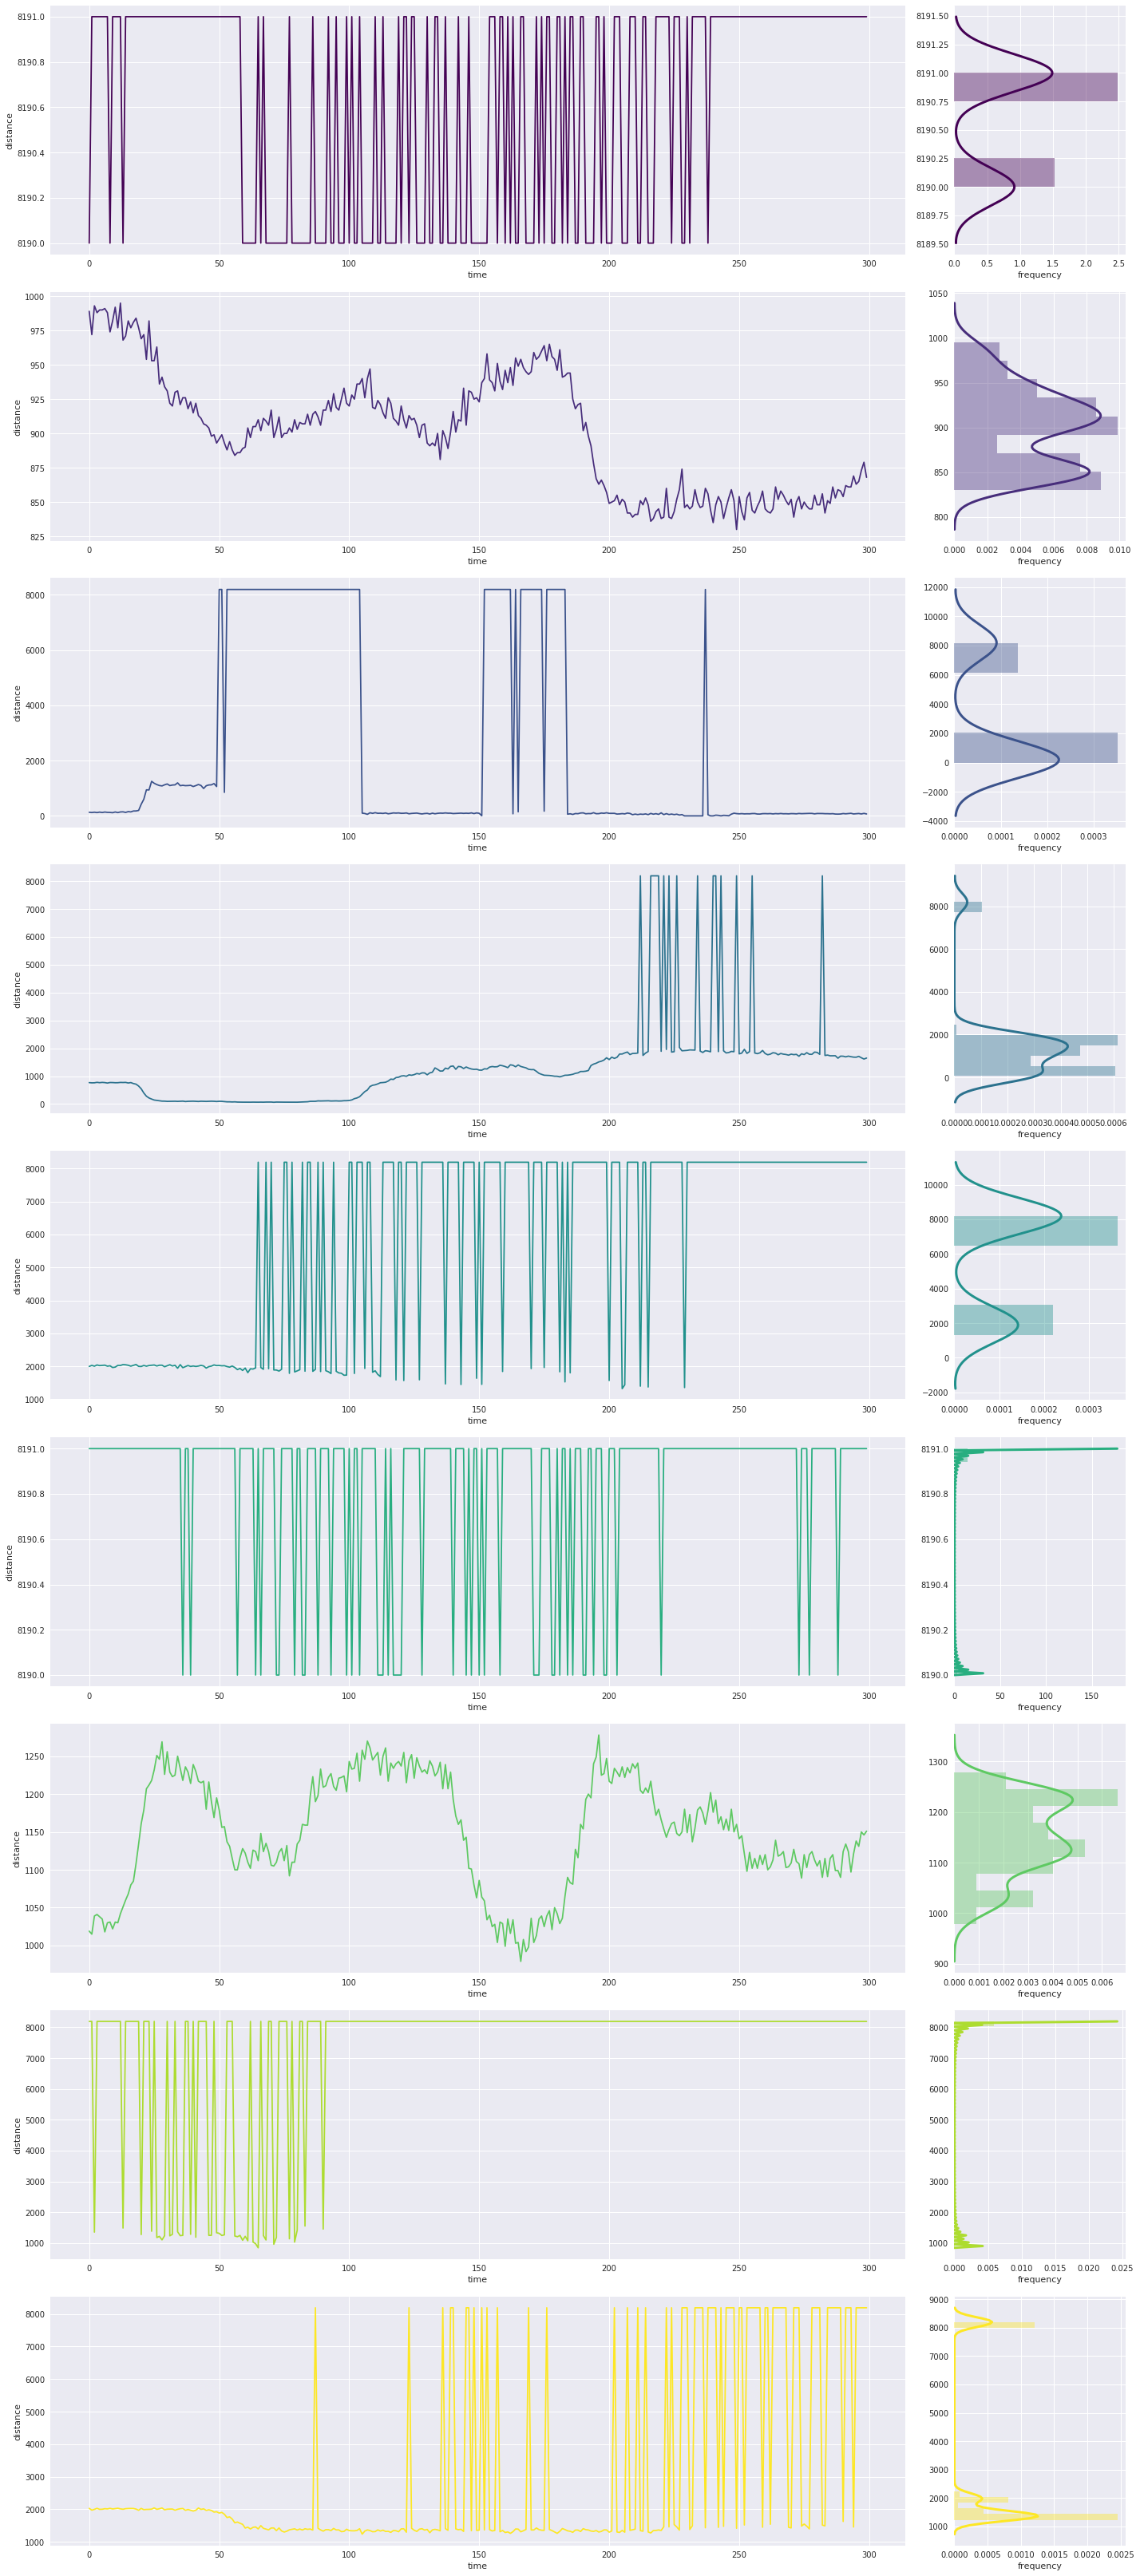

In [161]:
fig = plt.figure(figsize=(20, 5*num_channels))

for idx in range(num_channels):
    x = idx % num_channels
    y = idx % 1
    gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
    ax0 = plt.subplot(gs[x, y])
    plt.xlabel('time')
    plt.ylabel('distance')
    ax0.plot(t, X[:, idx], color=colors[idx])
    
    ax1 = plt.subplot(gs[x, y+1])
    vert_hist = np.histogram(X[:, idx])
#     ax1.hist(X[:, idx], bins=20, orientation="horizontal", color=colors[idx]);
    sns.distplot(X[:, idx], ax=ax1, vertical=True, hist_kws={"color": colors[idx]}, kde_kws={"color": colors[idx], "lw": 3})
    plt.xlabel('frequency')
plt.tight_layout()